Você foi designado para criar uma análise e simulação numérica de dados em um estudo de variabilidade climática. A partir de dados aleatórios simulando temperaturas ao longo de anos, você deverá calcular estatísticas, detectar anomalias e realizar uma simulação simples de ”cenário futuro” com mudanças climáticas.

Média das temperaturas: 34.58°C
Desvio Padrão: 0.61°C
Temperatura Mínima: 33.17°C
Temperatura Máxima: 36.36°C

Anomalias:
Ano: 1913, Temperatura: 33.17°C
Ano: 1914, Temperatura: 33.28°C
Ano: 2006, Temperatura: 36.00°C
Ano: 2013, Temperatura: 36.36°C
Ano: 2022, Temperatura: 35.92°C


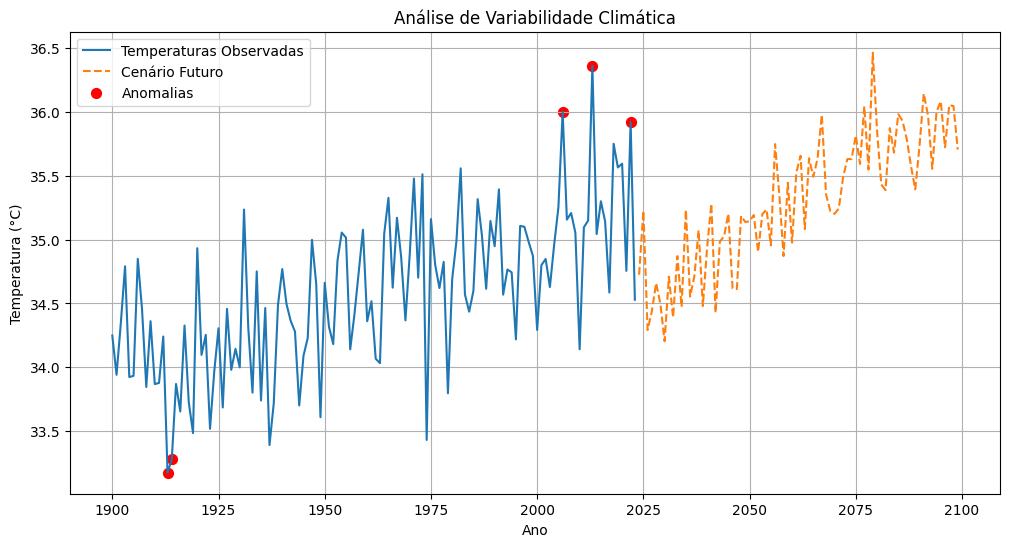

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulação de dados de temperatura
np.random.seed(42)  # para reprodutibilidade
anos = np.arange(1900, 2024)
temperaturas = 15 + np.random.randn(len(anos)) * 0.5 + 0.01 * anos # tendência de aquecimento

# Cálculo de estatísticas
media = np.mean(temperaturas)
desvio_padrao = np.std(temperaturas)
minima = np.min(temperaturas)
maxima = np.max(temperaturas)

print(f"Média das temperaturas: {media:.2f}°C")
print(f"Desvio Padrão: {desvio_padrao:.2f}°C")
print(f"Temperatura Mínima: {minima:.2f}°C")
print(f"Temperatura Máxima: {maxima:.2f}°C")


# Detecção de anomalias
anomalias = temperaturas[(temperaturas > media + 2 * desvio_padrao) | (temperaturas < media - 2 * desvio_padrao)]
anos_anomalias = anos[np.where((temperaturas > media + 2 * desvio_padrao) | (temperaturas < media - 2 * desvio_padrao))]

print("\nAnomalias:")
for ano, temp in zip(anos_anomalias, anomalias):
    print(f"Ano: {ano}, Temperatura: {temp:.2f}°C")


# Simulação de cenário futuro (aumento de 0.2°C por década)
anos_futuros = np.arange(2024, 2100)
temperaturas_futuros = temperaturas[-1] + 0.02 * (anos_futuros - anos[-1])  +  np.random.randn(len(anos_futuros)) * 0.3 # adicionando mais variabilidade

# Plot dos resultados
plt.figure(figsize=(12, 6))
plt.plot(anos, temperaturas, label="Temperaturas Observadas")
plt.plot(anos_futuros, temperaturas_futuros, label="Cenário Futuro", linestyle="--")

# destaque das anomalias
plt.scatter(anos_anomalias, anomalias, color='red', label="Anomalias", s=50)
plt.xlabel("Ano")
plt.ylabel("Temperatura (°C)")
plt.title("Análise de Variabilidade Climática")
plt.legend()
plt.grid(True)
plt.show()

Gere um array que simule as temperaturas médias mensais (em °C) de uma cidade ao longo de 10 anos (120 valores). A distribuição deve ser centrada em 15°C, com variação sazonal e ruído aleatório. Estatísticas e Análise Exploratória: Calcule estatísticas básicas: média anual, desvio padrão e percentis (25%, 50%, 75%) das temperaturas. Detecte meses ”anômalos” onde a temperatura esteja 2 desvios padrão acima ou abaixo da média anual. Simulação de Cenário Futuro.


In [ ]:
import numpy as np

# Gerar temperaturas mensais simuladas
np.random.seed(42)  # Para reprodutibilidade
temperaturas = []
for ano in range(10):
    for mes in range(12):
        # Variação sazonal (amplitude de 5°C)
        sazonal = 5 * np.sin(2 * np.pi * (mes + 1) / 12)
        # Ruído aleatório
        ruido = np.random.normal(0, 2) # Desvio padrão 2°C
        temperatura = 15 + sazonal + ruido
        temperaturas.append(temperatura)

temperaturas = np.array(temperaturas)

# Estatísticas básicas
media_anual = np.mean(temperaturas)
desvio_padrao = np.std(temperaturas)
percentis = np.percentile(temperaturas, [25, 50, 75])

print(f"Média Anual: {media_anual:.2f}°C")
print(f"Desvio Padrão: {desvio_padrao:.2f}°C")
print(f"Percentis (25%, 50%, 75%): {percentis}")

# Detecção de meses anômalos
meses_anomalos = []
for i, temp in enumerate(temperaturas):
    if temp > media_anual + 2 * desvio_padrao or temp < media_anual - 2 * desvio_padrao:
        meses_anomalos.append((i, temp))

print("Meses Anômalos (índice, temperatura):")
for mes in meses_anomalos:
    print(mes)

# Simulação de cenário futuro (aumento de 1°C na média anual)
aumento_temperatura = 1
futuro_temperaturas = temperaturas + aumento_temperatura

print("\nTemperaturas futuras (aumento de 1°C):")
futuro_temperaturas

Média Anual: 14.84°C
Desvio Padrão: 3.74°C
Percentis (25%, 50%, 75%): [12.00837032 15.3799712  17.81992934]
Meses Anômalos (índice, temperatura):
(3, 22.376186731738244)
(44, 7.042956019265145)
(73, 22.459414330550203)
(79, 6.694735151876023)

Temperaturas futuras (aumento de 1°C):


array([19.49342831, 20.05359842, 22.29537708, 23.37618673, 18.03169325,
       15.53172609, 16.65842563, 13.20474244, 10.06105123, 12.75499307,
       12.57316461, 15.06854049, 18.98392454, 16.50356653, 17.55016433,
       19.20555196, 16.47433776, 16.62849467, 11.68395185,  8.84526558,
       13.93129754, 11.21832038, 13.63505641, 13.15050363, 17.41123455,
       20.5519722 , 18.69801285, 21.08152306, 17.29872262, 15.4166125 ,
       12.29658678, 15.37442935, 10.97300555,  9.55445112, 15.14508982,
       13.5583127 , 18.91772719, 16.41078677, 18.3436279 , 20.72384949,
       19.97693316, 16.34273656, 13.26870344, 11.06766559,  8.04295602,
       10.23018456, 12.57872246, 18.11424445, 19.18723658, 16.80404671,
       21.64816794, 19.55996246, 17.146156  , 17.22335258, 15.56199904,
       13.53243322,  9.32156495, 11.05144823, 14.16252686, 17.95109025,
       17.54165152, 19.95880907, 18.78733005, 17.93771377, 20.12505164,
       18.71248006, 13.35597976, 13.67693878, 11.72327205, 10.37

Simule um aumento gradual de temperatura de 0.1°C por ano para
os próximos 50 anos. Gere um gráfico comparando a série histórica
original com a projeção futura. Análise Comparativa e
Visualização:
Crie visualizações (histogramas e box plots) para comparar a
distribuição de temperaturas dos primeiros 10 anos com a projeção
dos 50 anos seguintes.
Escreva um relatório, pode ser intercalado com o código no python
notebook com a descrição dos dados e a explicação dos achados

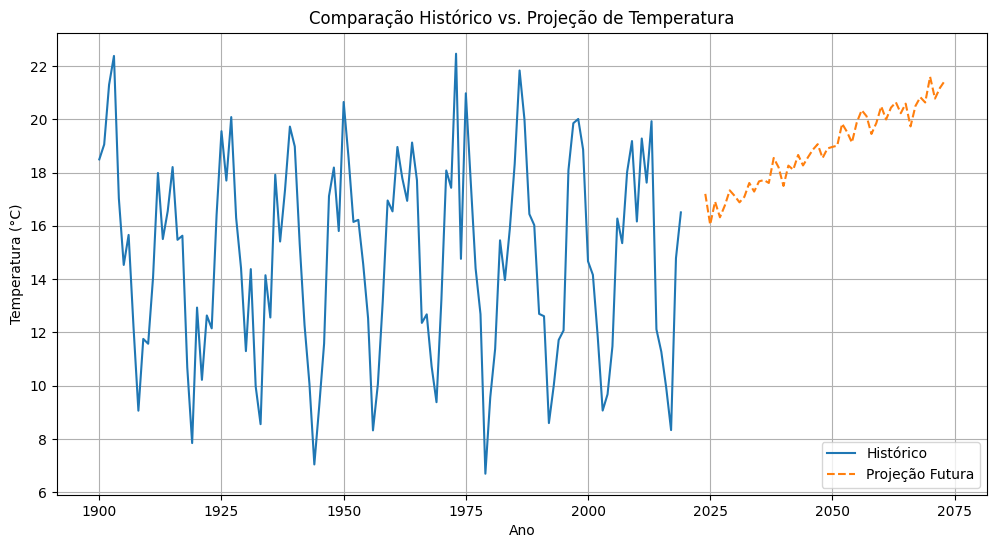

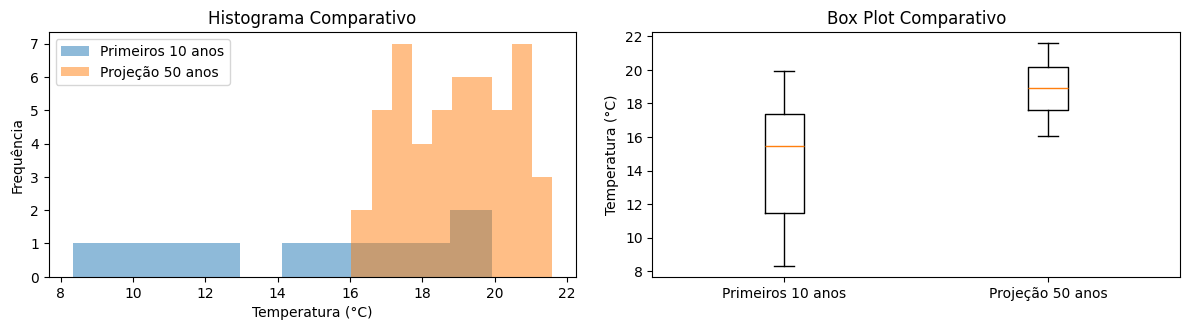


## Relatório de Análise de Temperatura
Este relatório apresenta a análise de um conjunto de dados de temperatura, incluindo uma simulação de um cenário futuro com um aumento gradual de temperatura.

### Dados:
- Conjunto de dados de temperaturas simuladas ao longo de vários anos.
- Simulação de aumento de temperatura de 0.1°C por ano para os próximos 50 anos.

### Análise:
O gráfico 'Comparação Histórico vs. Projeção de Temperatura' mostra a tendência de aquecimento projetada. O histograma e o box plot comparam a distribuição de temperatura dos últimos 10 anos com a projeção de 50 anos. O aumento na mediana e nos percentis superiores evidenciam uma mudança na distribuição das temperaturas futuras, indicando um aquecimento progressivo e um aumento da variabilidade.

### Conclusões:
A simulação projeta um aumento significativo na temperatura média nos próximos 50 anos.  A análise comparativa destaca uma mudança na distribuição das temperaturas, com um deslocamento para valores mais alto

In [ ]:
# Simulação de aumento gradual de temperatura
anos_futuros = np.arange(2024, 2074)  # Próximos 50 anos
aumento_anual = 0.1
temperaturas_futuros = temperaturas[-1] + aumento_anual * np.arange(len(anos_futuros)) + np.random.randn(len(anos_futuros)) * 0.3

min_len = min(len(anos), len(temperaturas))
anos = anos[:min_len]
temperaturas = temperaturas[:min_len]

# Gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(anos, temperaturas, label='Histórico', linestyle='-')
plt.plot(anos_futuros, temperaturas_futuros, label='Projeção Futura', linestyle='--')
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Comparação Histórico vs. Projeção de Temperatura')
plt.legend()
plt.grid(True)
plt.show()

# Análise comparativa: primeiros 10 anos vs. projeção de 50 anos
primeiros_10_anos = temperaturas[-10:] # pega os ultimos 10 anos do historico para comparar
plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
plt.hist(primeiros_10_anos, bins=10, alpha=0.5, label='Primeiros 10 anos')
plt.hist(temperaturas_futuros, bins=10, alpha=0.5, label='Projeção 50 anos')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.title('Histograma Comparativo')
plt.legend()


plt.subplot(2,2,2)
plt.boxplot([primeiros_10_anos, temperaturas_futuros], labels=['Primeiros 10 anos', 'Projeção 50 anos'])
plt.ylabel('Temperatura (°C)')
plt.title('Box Plot Comparativo')

plt.tight_layout()
plt.show()

# Relatório
print("\n## Relatório de Análise de Temperatura")

print("\n### Dados:")
print("- Conjunto de dados de temperaturas simuladas ao longo de vários anos.")
print("- Simulação de aumento de temperatura de 0.1°C por ano para os próximos 50 anos.")

print("\n### Análise:")
print("O gráfico 'Comparação Histórico vs. Projeção de Temperatura' mostra a tendência de aquecimento projetada. O histograma e o box plot comparam a distribuição de temperatura dos últimos 10 anos com a projeção de 50 anos. O aumento na mediana e nos percentis superiores evidenciam uma mudança na distribuição das temperaturas futuras, indicando um aquecimento progressivo e um aumento da variabilidade.")
